In [1]:
import torch
import torch.nn.init
import torchvision
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=10)

testset  = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=10)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [25]:
#GPU
cuda = torch.device('cuda')     # Default CUDA device

In [2]:
import matplotlib.pylab as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' % classes[labels[j]] for j in range(4)))

<Figure size 640x480 with 1 Axes>

 frog frog birdhorse


In [26]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.b1 = nn.BatchNorm2d(24)
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.b2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.b1((self.conv1(x)))))
        x = self.pool(F.relu(self.b2(self.conv2(x))))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
#GPU
net = net.cuda()

net

Net(
  (conv1): Conv2d(3, 24, kernel_size=(5, 5), stride=(1, 1))
  (b1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1600, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [31]:
for epoch in range(10,100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        #GPU
        inputs = inputs.cuda()
        labels = labels.cuda()
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 128 == 127:   # print every 2000 mini-batches
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i+ 1, running_loss / 128))
            running_loss = 0.0
    
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        
        #GPU
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        
    print('Accuracy 1000 test images : %d %%'% (100 * correct/total))
    
print('Finished Training')

torch.save(net.state_dict(), 'CNN.pkl')

[11,   128] loss : 0.207
[11,   256] loss : 0.221
[11,   384] loss : 0.243
Accuracy 1000 test images : 67 %
[12,   128] loss : 0.168
[12,   256] loss : 0.185
[12,   384] loss : 0.211
Accuracy 1000 test images : 67 %
[13,   128] loss : 0.154
[13,   256] loss : 0.166
[13,   384] loss : 0.176
Accuracy 1000 test images : 67 %
[14,   128] loss : 0.131
[14,   256] loss : 0.130
[14,   384] loss : 0.179
Accuracy 1000 test images : 67 %
[15,   128] loss : 0.102
[15,   256] loss : 0.125
[15,   384] loss : 0.147
Accuracy 1000 test images : 66 %
[16,   128] loss : 0.101
[16,   256] loss : 0.116
[16,   384] loss : 0.135
Accuracy 1000 test images : 66 %
[17,   128] loss : 0.083
[17,   256] loss : 0.096
[17,   384] loss : 0.108
Accuracy 1000 test images : 67 %
[18,   128] loss : 0.063
[18,   256] loss : 0.093
[18,   384] loss : 0.112
Accuracy 1000 test images : 66 %
[19,   128] loss : 0.071
[19,   256] loss : 0.095
[19,   384] loss : 0.097
Accuracy 1000 test images : 66 %
[20,   128] loss : 0.076
[20

KeyboardInterrupt: 

In [32]:
for data in testloader:
    images, labels = data
    print(labels.size())
    print(labels)
    print(labels.size(0))

torch.Size([4])
tensor([3, 8, 8, 0])
4
torch.Size([4])
tensor([6, 6, 1, 6])
4
torch.Size([4])
tensor([3, 1, 0, 9])
4
torch.Size([4])
tensor([5, 7, 9, 8])
4
torch.Size([4])
tensor([5, 7, 8, 6])
4
torch.Size([4])
tensor([7, 0, 4, 9])
4
torch.Size([4])
tensor([5, 2, 4, 0])
4
torch.Size([4])
tensor([9, 6, 6, 5])
4
torch.Size([4])
tensor([4, 5, 9, 2])
4
torch.Size([4])
tensor([4, 1, 9, 5])
4
torch.Size([4])
tensor([4, 6, 5, 6])
4
torch.Size([4])
tensor([0, 9, 3, 9])
4
torch.Size([4])
tensor([7, 6, 9, 8])
4
torch.Size([4])
tensor([0, 3, 8, 8])
4
torch.Size([4])
tensor([7, 7, 4, 6])
4
torch.Size([4])
tensor([7, 3, 6, 3])
4
torch.Size([4])
tensor([6, 2, 1, 2])
4
torch.Size([4])
tensor([3, 7, 2, 6])
4
torch.Size([4])
tensor([8, 8, 0, 2])
4
torch.Size([4])
tensor([9, 3, 3, 8])
4
torch.Size([4])
tensor([8, 1, 1, 7])
4
torch.Size([4])
tensor([2, 5, 2, 7])
4
torch.Size([4])
tensor([8, 9, 0, 3])
4
torch.Size([4])
tensor([8, 6, 4, 6])
4
torch.Size([4])
tensor([6, 0, 0, 7])
4
torch.Size([4])
tensor([4

tensor([3, 7, 3, 5])
4
torch.Size([4])
tensor([2, 6, 6, 5])
4
torch.Size([4])
tensor([8, 7, 1, 6])
4
torch.Size([4])
tensor([8, 8, 5, 3])
4
torch.Size([4])
tensor([0, 4, 0, 1])
4
torch.Size([4])
tensor([3, 8, 8, 0])
4
torch.Size([4])
tensor([6, 9, 9, 9])
4
torch.Size([4])
tensor([5, 5, 8, 6])
4
torch.Size([4])
tensor([0, 0, 4, 2])
4
torch.Size([4])
tensor([3, 2, 7, 2])
4
torch.Size([4])
tensor([2, 5, 9, 8])
4
torch.Size([4])
tensor([9, 1, 7, 4])
4
torch.Size([4])
tensor([0, 3, 0, 1])
4
torch.Size([4])
tensor([3, 8, 3, 9])
4
torch.Size([4])
tensor([6, 1, 4, 7])
4
torch.Size([4])
tensor([0, 3, 7, 8])
4
torch.Size([4])
tensor([9, 1, 1, 6])
4
torch.Size([4])
tensor([6, 6, 6, 9])
4
torch.Size([4])
tensor([1, 9, 9, 4])
4
torch.Size([4])
tensor([2, 1, 7, 0])
4
torch.Size([4])
tensor([6, 8, 1, 9])
4
torch.Size([4])
tensor([2, 9, 0, 4])
4
torch.Size([4])
tensor([7, 8, 3, 1])
4
torch.Size([4])
tensor([2, 0, 1, 5])
4
torch.Size([4])
tensor([8, 4, 6, 3])
4
torch.Size([4])
tensor([8, 1, 3, 8])
4
to

tensor([0, 1, 1, 8])
4
torch.Size([4])
tensor([4, 5, 3, 1])
4
torch.Size([4])
tensor([2, 4, 8, 9])
4
torch.Size([4])
tensor([8, 1, 7, 2])
4
torch.Size([4])
tensor([7, 2, 3, 2])
4
torch.Size([4])
tensor([6, 7, 9, 4])
4
torch.Size([4])
tensor([0, 1, 0, 4])
4
torch.Size([4])
tensor([5, 0, 8, 0])
4
torch.Size([4])
tensor([7, 6, 1, 0])
4
torch.Size([4])
tensor([8, 5, 9, 2])
4
torch.Size([4])
tensor([5, 4, 4, 9])
4
torch.Size([4])
tensor([0, 6, 1, 2])
4
torch.Size([4])
tensor([5, 1, 6, 7])
4
torch.Size([4])
tensor([1, 5, 8, 8])
4
torch.Size([4])
tensor([0, 3, 9, 4])
4
torch.Size([4])
tensor([0, 3, 4, 9])
4
torch.Size([4])
tensor([2, 4, 3, 0])
4
torch.Size([4])
tensor([6, 4, 5, 6])
4
torch.Size([4])
tensor([6, 7, 8, 4])
4
torch.Size([4])
tensor([8, 8, 3, 2])
4
torch.Size([4])
tensor([8, 0, 2, 5])
4
torch.Size([4])
tensor([6, 8, 7, 8])
4
torch.Size([4])
tensor([9, 9, 0, 6])
4
torch.Size([4])
tensor([6, 8, 1, 1])
4
torch.Size([4])
tensor([7, 4, 4, 2])
4
torch.Size([4])
tensor([3, 6, 9, 6])
4
to

torch.Size([4])
tensor([2, 0, 1, 4])
4
torch.Size([4])
tensor([1, 8, 5, 5])
4
torch.Size([4])
tensor([7, 9, 8, 3])
4
torch.Size([4])
tensor([7, 9, 1, 5])
4
torch.Size([4])
tensor([6, 9, 8, 7])
4
torch.Size([4])
tensor([2, 0, 9, 0])
4
torch.Size([4])
tensor([8, 5, 9, 4])
4
torch.Size([4])
tensor([2, 9, 8, 1])
4
torch.Size([4])
tensor([9, 1, 8, 3])
4
torch.Size([4])
tensor([7, 6, 4, 2])
4
torch.Size([4])
tensor([3, 7, 0, 3])
4
torch.Size([4])
tensor([5, 8, 8, 8])
4
torch.Size([4])
tensor([7, 9, 6, 2])
4
torch.Size([4])
tensor([7, 4, 5, 7])
4
torch.Size([4])
tensor([6, 7, 1, 7])
4
torch.Size([4])
tensor([3, 6, 8, 2])
4
torch.Size([4])
tensor([6, 6, 7, 1])
4
torch.Size([4])
tensor([5, 9, 7, 1])
4
torch.Size([4])
tensor([7, 0, 1, 6])
4
torch.Size([4])
tensor([3, 3, 9, 0])
4
torch.Size([4])
tensor([1, 2, 3, 2])
4
torch.Size([4])
tensor([2, 5, 4, 9])
4
torch.Size([4])
tensor([8, 7, 4, 4])
4
torch.Size([4])
tensor([9, 7, 6, 7])
4
torch.Size([4])
tensor([7, 1, 2, 3])
4
torch.Size([4])
tensor([5

torch.Size([4])
tensor([9, 3, 0, 9])
4
torch.Size([4])
tensor([5, 3, 7, 9])
4
torch.Size([4])
tensor([4, 4, 1, 7])
4
torch.Size([4])
tensor([7, 1, 4, 1])
4
torch.Size([4])
tensor([2, 8, 7, 0])
4
torch.Size([4])
tensor([0, 4, 7, 2])
4
torch.Size([4])
tensor([9, 7, 6, 9])
4
torch.Size([4])
tensor([3, 5, 8, 0])
4
torch.Size([4])
tensor([3, 6, 8, 3])
4
torch.Size([4])
tensor([2, 4, 7, 1])
4
torch.Size([4])
tensor([1, 3, 9, 7])
4
torch.Size([4])
tensor([5, 1, 0, 8])
4
torch.Size([4])
tensor([7, 0, 1, 6])
4
torch.Size([4])
tensor([9, 3, 2, 7])
4
torch.Size([4])
tensor([7, 8, 1, 0])
4
torch.Size([4])
tensor([3, 4, 6, 7])
4
torch.Size([4])
tensor([5, 2, 0, 1])
4
torch.Size([4])
tensor([5, 5, 1, 4])
4
torch.Size([4])
tensor([1, 3, 0, 8])
4
torch.Size([4])
tensor([6, 2, 1, 3])
4
torch.Size([4])
tensor([6, 4, 1, 9])
4
torch.Size([4])
tensor([0, 4, 1, 0])
4
torch.Size([4])
tensor([1, 9, 8, 6])
4
torch.Size([4])
tensor([9, 2, 4, 7])
4
torch.Size([4])
tensor([2, 2, 7, 4])
4
torch.Size([4])
tensor([9

torch.Size([4])
tensor([0, 3, 6, 3])
4
torch.Size([4])
tensor([3, 8, 1, 8])
4
torch.Size([4])
tensor([1, 3, 1, 5])
4
torch.Size([4])
tensor([4, 5, 1, 8])
4
torch.Size([4])
tensor([9, 1, 3, 1])
4
torch.Size([4])
tensor([7, 2, 9, 8])
4
torch.Size([4])
tensor([9, 4, 6, 0])
4
torch.Size([4])
tensor([9, 4, 0, 4])
4
torch.Size([4])
tensor([6, 2, 1, 3])
4
torch.Size([4])
tensor([0, 8, 5, 6])
4
torch.Size([4])
tensor([0, 3, 4, 6])
4
torch.Size([4])
tensor([9, 5, 7, 9])
4
torch.Size([4])
tensor([0, 3, 6, 5])
4
torch.Size([4])
tensor([7, 0, 5, 1])
4
torch.Size([4])
tensor([2, 2, 9, 7])
4
torch.Size([4])
tensor([0, 0, 1, 4])
4
torch.Size([4])
tensor([4, 5, 5, 9])
4
torch.Size([4])
tensor([6, 3, 6, 2])
4
torch.Size([4])
tensor([6, 9, 3, 2])
4
torch.Size([4])
tensor([3, 2, 4, 9])
4
torch.Size([4])
tensor([5, 2, 1, 6])
4
torch.Size([4])
tensor([6, 4, 7, 6])
4
torch.Size([4])
tensor([3, 3, 8, 1])
4
torch.Size([4])
tensor([4, 6, 4, 4])
4
torch.Size([4])
tensor([5, 6, 2, 0])
4
torch.Size([4])
tensor([5

torch.Size([4])
tensor([5, 7, 1, 8])
4
torch.Size([4])
tensor([7, 3, 5, 4])
4
torch.Size([4])
tensor([4, 3, 8, 6])
4
torch.Size([4])
tensor([1, 1, 6, 3])
4
torch.Size([4])
tensor([2, 2, 8, 9])
4
torch.Size([4])
tensor([8, 3, 3, 8])
4
torch.Size([4])
tensor([1, 1, 0, 5])
4
torch.Size([4])
tensor([2, 0, 5, 0])
4
torch.Size([4])
tensor([5, 8, 6, 3])
4
torch.Size([4])
tensor([9, 6, 6, 3])
4
torch.Size([4])
tensor([9, 4, 8, 3])
4
torch.Size([4])
tensor([4, 3, 1, 1])
4
torch.Size([4])
tensor([2, 9, 7, 8])
4
torch.Size([4])
tensor([5, 5, 8, 6])
4
torch.Size([4])
tensor([9, 0, 8, 3])
4
torch.Size([4])
tensor([5, 1, 3, 3])
4
torch.Size([4])
tensor([5, 5, 3, 8])
4
torch.Size([4])
tensor([1, 4, 6, 4])
4
torch.Size([4])
tensor([2, 4, 3, 8])
4
torch.Size([4])
tensor([9, 6, 6, 6])
4
torch.Size([4])
tensor([5, 5, 2, 7])
4
torch.Size([4])
tensor([7, 4, 4, 9])
4
torch.Size([4])
tensor([3, 8, 3, 7])
4
torch.Size([4])
tensor([7, 8, 5, 3])
4
torch.Size([4])
tensor([9, 1, 6, 7])
4
torch.Size([4])
tensor([3

tensor([0, 7, 4, 1])
4
torch.Size([4])
tensor([6, 6, 8, 8])
4
torch.Size([4])
tensor([9, 0, 9, 0])
4
torch.Size([4])
tensor([1, 3, 3, 0])
4
torch.Size([4])
tensor([9, 6, 6, 2])
4
torch.Size([4])
tensor([6, 3, 4, 0])
4
torch.Size([4])
tensor([8, 4, 1, 4])
4
torch.Size([4])
tensor([0, 6, 5, 0])
4
torch.Size([4])
tensor([9, 9, 9, 9])
4
torch.Size([4])
tensor([1, 2, 3, 5])
4
torch.Size([4])
tensor([4, 2, 9, 6])
4
torch.Size([4])
tensor([0, 9, 6, 6])
4
torch.Size([4])
tensor([8, 0, 6, 1])
4
torch.Size([4])
tensor([4, 6, 8, 0])
4
torch.Size([4])
tensor([5, 4, 1, 2])
4
torch.Size([4])
tensor([0, 9, 6, 4])
4
torch.Size([4])
tensor([2, 4, 6, 5])
4
torch.Size([4])
tensor([9, 7, 7, 4])
4
torch.Size([4])
tensor([6, 5, 0, 1])
4
torch.Size([4])
tensor([9, 0, 3, 1])
4
torch.Size([4])
tensor([9, 0, 9, 7])
4
torch.Size([4])
tensor([8, 6, 7, 6])
4
torch.Size([4])
tensor([8, 2, 4, 5])
4
torch.Size([4])
tensor([3, 0, 3, 2])
4
torch.Size([4])
tensor([1, 7, 5, 9])
4
torch.Size([4])
tensor([3, 4, 5, 7])
4
to

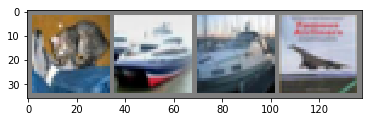

GroundTruth :    cat ship shipplane


In [33]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ',''.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
outputsts = neVariableiable(images)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

NameError: name 'neVariableiable' is not defined

In [12]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variableable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accurcay to 10000 test images : %d %%' %(100* correct / total))

NameError: name 'Variableable' is not defined

In [14]:
class_correct = [0. for i in range(10)]
class_total = [0. for i in range(10)]
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        


In [15]:
class_correct

[tensor(193, dtype=torch.uint8),
 tensor(201, dtype=torch.uint8),
 tensor(252, dtype=torch.uint8),
 tensor(236, dtype=torch.uint8),
 tensor(183, dtype=torch.uint8),
 tensor(68, dtype=torch.uint8),
 tensor(106, dtype=torch.uint8),
 tensor(197, dtype=torch.uint8),
 tensor(220, dtype=torch.uint8),
 tensor(77, dtype=torch.uint8)]

In [18]:
classes[1]

'car'

In [24]:
class_correct[2]

tensor(252, dtype=torch.uint8)

In [17]:
for i in range(10):
    print('Accuray of %s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

RuntimeError: value cannot be converted to type uint8_t without overflow: 1000.000000